In [17]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import random

In [18]:
def softmax (Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0 )
    return A

In [19]:
def softmax_stable (Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0 , keepdims = True))
    A = e_Z / e_Z.sum(axis = 0 )
    return A

In [20]:
N = 2 
d = 2 
C = 3
X = np.random.randn(d,N)
y = np.random.randint(0,3,(N))

In [21]:
def convert_labels (y,C = C):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y,np.arange(len(y)))),shape = (C,len(y))).toarray()
    return Y
Y = convert_labels(y,C)

In [22]:
def cost (X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

W_init = np.random.randn(d,C)

def grad (X, Y ,W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)

def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i,j] += eps
            W_n[i,j] -= eps
            g[i,j] = cost(X ,Y ,W_p) - cost(X,Y,W_n)/ (2*eps)
    return g
g1 = grad(X,Y,W_init)
g2 = numerical_grad(X, Y, W_init, cost)
print(np.linalg.norm(g1-g2))

4425931.012421939


In [23]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]    
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05 
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)

In [24]:
def pred(W,X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A,axis = 0)


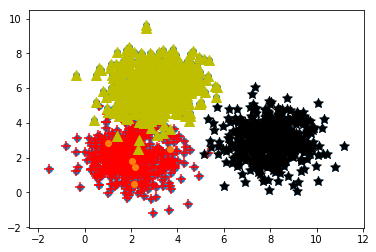

In [38]:
means = np.array([[2, 2], [8, 3], [3, 6]])

cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(random.choice(means),cov,5)
# each column is a datapoint
X = np.concatenate((X0, X1, X2), axis = 0).T 
# extended data
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
plt.scatter(X[1],X[2])
plt.scatter(X0[:,0],X0[:,1],s = 100 ,marker = '+', color = 'r')
plt.scatter(X1[:,0],X1[:,1],s = 100, marker = '*',color = 'k')
plt.scatter(X2[:,0],X2[:,1],s = 100,marker= '^',color = 'y')
plt.scatter(means[0,0], means[0,1],marker = '+', color = 'r')
plt.scatter(means[1,0],means[1,1], marker = '*', color = 'K')
plt.scatter(means[2,0],means[2,1], marker= '^', color = 'y')
plt.scatter(X3[:,0],X3[:,1])
   

In [26]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)

print(W[-1])



[[ 8.42469047 -3.6170129  -3.79544095]
 [-0.82496049  1.55454434 -0.87372831]
 [-1.22728896 -1.19305014  1.74159217]]


In [28]:
linear_model.LogisticRegression(C=1e5, solver = 'lbfgs', multi_class = 'multinomial')

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

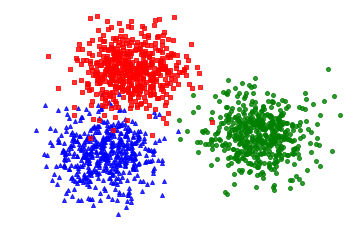

In [33]:

def display(X, label):

    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    
    plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1, :], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize = 4, alpha = .8)


    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)

In [34]:
print(X)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [2.87187873 2.8918343  1.25463853 ... 2.25623709 3.04479195 4.07953913]
 [0.79255517 1.9087641  1.66100317 ... 7.28108237 5.76483339 6.03280849]]


In [35]:

xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

print(XX.shape)

Z = pred(W[-1], XX)

(1, 270400)
(3, 270400)


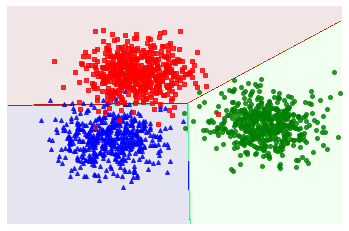

<Figure size 432x288 with 0 Axes>

In [36]:
 
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())

display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()

In [ ]:
#X4 = np.concatenate((np.ones((1, 5)), X3.T), axis = 0)
